# **🔦 Data Exploration**

---

## 📥 Imports

In [1]:
# Data
import pandas as pd 
import numpy as np 

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Misc
import warnings

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings('ignore')

## 🎨 Styling

In [3]:
blue = '#146EF5'
red = '#ED3767'
amber = '#F5B14C'
mint = '#17BED1'
purple = '#815ADB'
pink = '#FF8FB8'

text_darker = '#7a8493'
text = '#a0a9b6'
background = '#f9fafc'

# Qualitative colormap
palette = [blue, red, amber, mint, purple, pink]

In [4]:
params = {
    'figure.figsize': (9, 6), 
    'figure.dpi': 150,
    'figure.facecolor': background,
    
    'axes.facecolor': background,
    'axes.edgecolor': text, 
    'axes.labelcolor': text,
    'axes.titlecolor': text_darker,
    'text.color': text, 
    'xtick.color': text, 
    'ytick.color': text,
    
    'font.size': 16, 
    'axes.titlesize': 16,    
    'axes.labelsize': 12,
    'xtick.labelsize': 12, 
    'ytick.labelsize': 12,
    
    'axes.spines.right': False, 
    'axes.spines.top': False
}

sns.set(context='notebook', style='white', palette=palette, rc=params)

## 👀 Data Preparation

In [5]:
df_demand = pd.read_csv("../data/raw/demanda.csv")
df_demand_test = pd.read_csv("../data/raw/demanda_test.csv")

df_products = pd.read_csv("../data/raw/catalogo_productos.csv")

### 🪙 Demand

In [6]:
df_demand.head()

,date,id_producto,demanda
0,2020-01-01,3,869
1,2020-01-01,4,407
2,2020-01-01,5,182
3,2020-01-01,6,91
4,2020-01-01,7,520


In [7]:
# Transform date to timestamp
df_demand["date"] = pd.to_datetime(df_demand["date"])

# Transform id_producto to string
df_demand["id_producto"] = df_demand["id_producto"].astype(str)

In [8]:
df_demand.describe(include='all')

,date,id_producto,demanda
count,126460,126460,126460.00
unique,NaN,135,NaN
top,NaN,60,NaN
freq,NaN,1028,NaN
mean,2021-06-15 21:19:40.262533120,NaN,318.93
min,2020-01-01 00:00:00,NaN,3.00
25%,2020-09-26 00:00:00,NaN,169.00
50%,2021-06-16 00:00:00,NaN,290.00
75%,2022-03-06 00:00:00,NaN,435.00
max,2022-11-30 00:00:00,NaN,1670.00


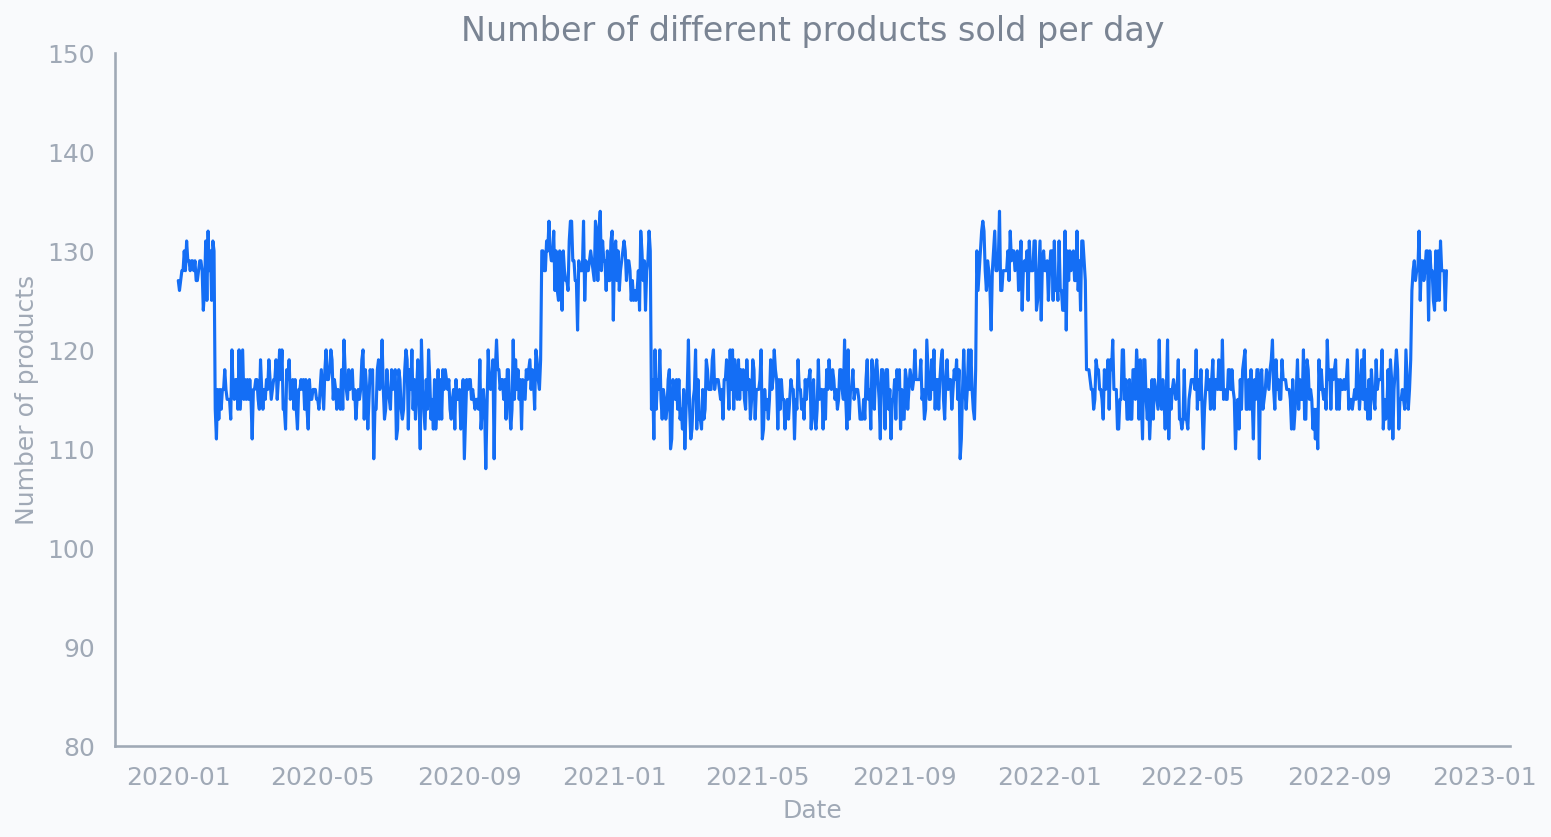

In [9]:
products_per_day = df_demand.groupby("date")['id_producto'].nunique().to_frame().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=products_per_day, x="date", y="id_producto", color=blue)
plt.title("Number of different products sold per day")
plt.xlabel("Date")
plt.ylabel("Number of products")
plt.ylim(80, 150)
plt.show()

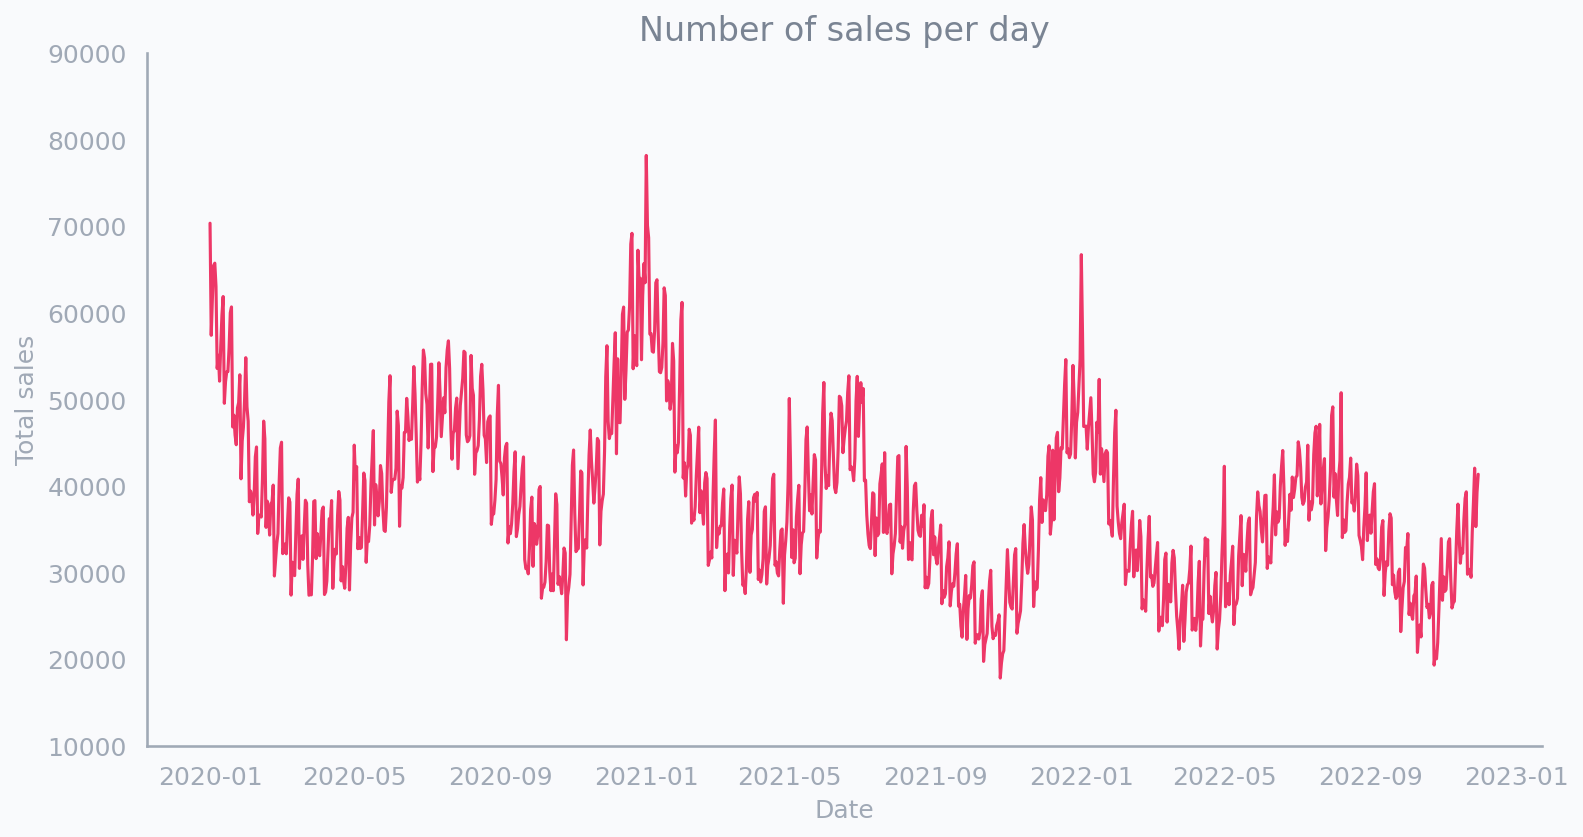

In [10]:
sales_per_day = df_demand.groupby("date")['demanda'].sum().to_frame().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_per_day, x="date", y="demanda", color=red)
plt.title("Number of sales per day")
plt.xlabel("Date")
plt.ylabel("Total sales")
plt.ylim(10_000, 90_000)
plt.show()

Some findings: 
- There are 135 different products in the table
- The date range is from January 1st, 2020 to November 30th, 2022.
- The average demand for products in a single day is 318.
- Looks like there's some seasonality both in total sales and the products sold.
- The sales volume have a negative trend.


### 🧺 Products

In [11]:
print('Shape:', df_products.shape)
df_products.head()

Shape: (135, 8)


,id_producto,categoria,subcategoria,tamaño,premium,marca_exclusiva,estacional,nit_proveedor
0,1,bebidas,Agua,Mediano,0.00,1,0,890900667.00
1,2,jabones,Antibacterial,Pequeño,NaN,0,0,890900667.00
2,3,bebidas,Gaseosa,Pequeño,0.00,1,0,890900667.00
3,4,congelados,Vegetales,Pequeño,0.00,1,1,890900667.00
4,5,shampoos,Acondicionador,Pequeño,0.00,1,0,890900667.00


In [12]:
# Check dtypes
df_products.dtypes

id_producto          int64
categoria           object
subcategoria        object
tamaño              object
premium            float64
marca_exclusiva      int64
estacional           int64
nit_proveedor      float64
dtype: object

In [13]:
# Check missing values 
df_products.isnull().sum()

id_producto         0
categoria           0
subcategoria       32
tamaño              3
premium             5
marca_exclusiva     0
estacional          0
nit_proveedor       1
dtype: int64

In [14]:
df_products.premium.value_counts()

premium
0.00    120
1.00     10
Name: count, dtype: int64

In [15]:
# Let's assume nulls are false 
df_products.premium.fillna(0, inplace=True)

In [16]:
# Convert dychothomous columns to boolean
df_products.premium = df_products.premium.astype(bool)
df_products.marca_exclusiva = df_products.marca_exclusiva.astype(bool)
df_products.estacional = df_products.estacional.astype(bool)

# Convert categorical columns to string
df_products.id_producto = df_products.id_producto.astype(str)
df_products.nit_proveedor = df_products.nit_proveedor.astype(str)

In [17]:
# Convert to lower case
for col in df_products.select_dtypes(include=['object']):
    df_products[col] = df_products[col].str.lower()

Now we check missing values

In [18]:
df_products.isna().sum()

id_producto         0
categoria           0
subcategoria       32
tamaño              3
premium             0
marca_exclusiva     0
estacional          0
nit_proveedor       0
dtype: int64

In [19]:
# Count null per group
df_products.groupby('categoria').agg(lambda x: x.isna().sum())

,id_producto,subcategoria,tamaño,premium,marca_exclusiva,estacional,nit_proveedor
categoria,,,,,,,
aseo,0,1,0,0,0,0,0
bebidas,0,3,1,0,0,0,0
carnes_y_aves,0,1,1,0,0,0,0
cereales_y_productos_secos,0,0,0,0,0,0,0
congelados,0,1,0,0,0,0,0
frutas_y_verduras,0,1,0,0,0,0,0
jabones,0,0,0,0,0,0,0
panaderia_y_panificados,0,1,0,0,0,0,0
productos_enlatados_y_alimentos_envasados,0,21,0,0,0,0,0


In [20]:
df_products.tamaño.value_counts()

tamaño
pequeño    105
mediano     20
grande       7
Name: count, dtype: int64

To fill the missing values for `subcategoria`, I'll assumme the product itself doesn't have a predefined subcategory yet so I will impute the subcategory with "indefinido". 

For the `tamaño` column, since we have only 3 nulls, I will use the most frequent label, which is "pequeño".

In [21]:
df_products['subcategoria'].fillna("indefinido", inplace=True)
df_products['tamaño'].fillna("pequeño", inplace=True)

We can describe the dataframe.

In [22]:
df_products.describe(include='all')

,id_producto,categoria,subcategoria,tamaño,premium,marca_exclusiva,estacional,nit_proveedor
count,135,135,135,135,135,135,135,135
unique,135,11,30,3,2,2,2,2
top,1,bebidas,indefinido,pequeño,False,True,False,890900667.0
freq,1,39,32,108,125,76,122,134


In [23]:
df_products.nit_proveedor.value_counts()

nit_proveedor
890900667.0    134
nan              1
Name: count, dtype: int64

We see that there are 134 different products from a single provider. Therefore, we can drop this column since won't give any information to our model.


⁂


Now let's give a look to the distribution of products

In [24]:
bool_cols = df_products.select_dtypes(bool).columns
df_bool_counts = df_products.groupby(['categoria', 'subcategoria'])[bool_cols].sum()
df_bool_counts.join(df_products.groupby(['categoria', 'subcategoria']).size().to_frame().rename(columns={0: 'total'}))

premium  \
categoria                                 subcategoria                     
aseo                                      cuidado personal             1   
                                          indefinido                   0   
                                          limpieza general             0   
bebidas                                   agua                         0   
                                          cerveza internacional        0   
                                          cerveza nacional             0   
                                          gaseosa                      2   
                                          indefinido                   0   
                                          licor nacional               0   
                                          vinos                        0   
carnes_y_aves                             cerdo                        1   
                                          indefinido                   0   
                                          pavo                         0   
                                          pollo                        0   
                                          res                          1   
cereales_y_productos_secos                arroz                        0   
                                          frutos secos                 0   
                                          legumbres                    0   
                                          pasta                        0   
congelados                                helados                      0   
                                          indefinido                   0   
                                          vegetales                    0   
frutas_y_verduras                         enlatadas                    0   
                                          frescas                      0   
                                          indefinido                   1   
jabones                                   antibacterial                0   
panaderia_y_panificados                   indefinido                   0   
                                          integral                     0   
                                          otros                        0   
productos_enlatados_y_alimentos_envasados indefinido                   2   
productos_lacteos                         crema                        0   
                                          indefinido                   1   
                                          leche                        0   
                                          queso                        1   
                                          yogur                        0   
shampoos                                  acondicionador               0   
                                          hidratante                   0   
                                          indefinido                   0   

                                                                 marca_exclusiva  \
categoria                                 subcategoria                             
aseo                                      cuidado personal                     2   
                                          indefinido                           1   
                                          limpieza general                     1   
bebidas                                   agua                                 4   
                                          cerveza internacional                2   
                                          cerveza nacional                     0   
                                          gaseosa                              5   
                                          indefinido                           2   
                                          licor nacional                       2   
                                          vinos                                4   
carnes_y_aves   

The products brands marked with seasonal includes: a international beer, a soda, two wines, a chicken, a rice, a legumes, two frozen vegetables, and one cream. All of those seem to be seasonal products related to food in festivities. We'll check later if they indeed have a seasonality behaviour.

Another hypothesis is that the products which are exclusive brands may be the ones more resilient to competition and the non-exclusive/non-premium may be more sensible to competitors' strategies like promotions and better pricing. 


But before testing these hypothesis, let's join both tables.

In [25]:
df_demand_pro = pd.merge(
    left=df_demand,
    right=df_products.drop(columns=['nit_proveedor']),
    how='left',
    on='id_producto'
)

df_demand_pro.columns = [
    'date', 'product_id', 'demand', 'category', 'subcategory', 'size', 
    'is_premium', 'is_exclusive', 'is_seasonal'
]

In [26]:
df_demand_pro.sample(7)

,date,product_id,demand,category,subcategory,size,is_premium,is_exclusive,is_seasonal
49349,2021-02-16,53,389,bebidas,gaseosa,mediano,False,False,False
40651,2020-12-09,26,274,cereales_y_productos_secos,arroz,pequeño,False,False,False
108168,2022-06-29,47,199,cereales_y_productos_secos,frutos secos,pequeño,False,True,False
80961,2021-11-14,114,200,productos_lacteos,leche,pequeño,False,True,False
37296,2020-11-13,2,271,jabones,antibacterial,pequeño,False,False,False
17801,2020-05-30,21,367,productos_enlatados_y_alimentos_envasados,indefinido,pequeño,False,False,False
41824,2020-12-18,35,496,bebidas,agua,pequeño,False,False,False


In [27]:
# Apply the same processing to the test data
df_demand_test["date"] = pd.to_datetime(df_demand_test["date"])
df_demand_test["id_producto"] = df_demand_test["id_producto"].astype(str)

df_demand_test_pro = pd.merge(
    left=df_demand_test,
    right=df_products.drop(columns=['nit_proveedor']),
    how='left',
    on='id_producto'
)

df_demand_test_pro.columns = [
    'date', 'product_id', 'category', 'subcategory', 'size', 'is_premium', 
    'is_exclusive', 'is_seasonal'
]

In [28]:
df_demand_pro.to_csv("../data/processed/demand_products.csv", index=False)
df_demand_test_pro.to_csv("../data/processed/demand_products_test.csv", index=False)

## 🛟 Deep diving the time series

### 🎢 Seasonality

Let's check what is the weekly, monthly and yearly seasonality of sales and if it changes depending on the product category.

In [29]:
df_demand_pro.set_index('date', inplace=True)

In [30]:
# filter 2 weeks from summer 2021 to deep dive
df_demand_pro_ = df_demand_pro.loc['2021-06-01':'2021-06-14'] 

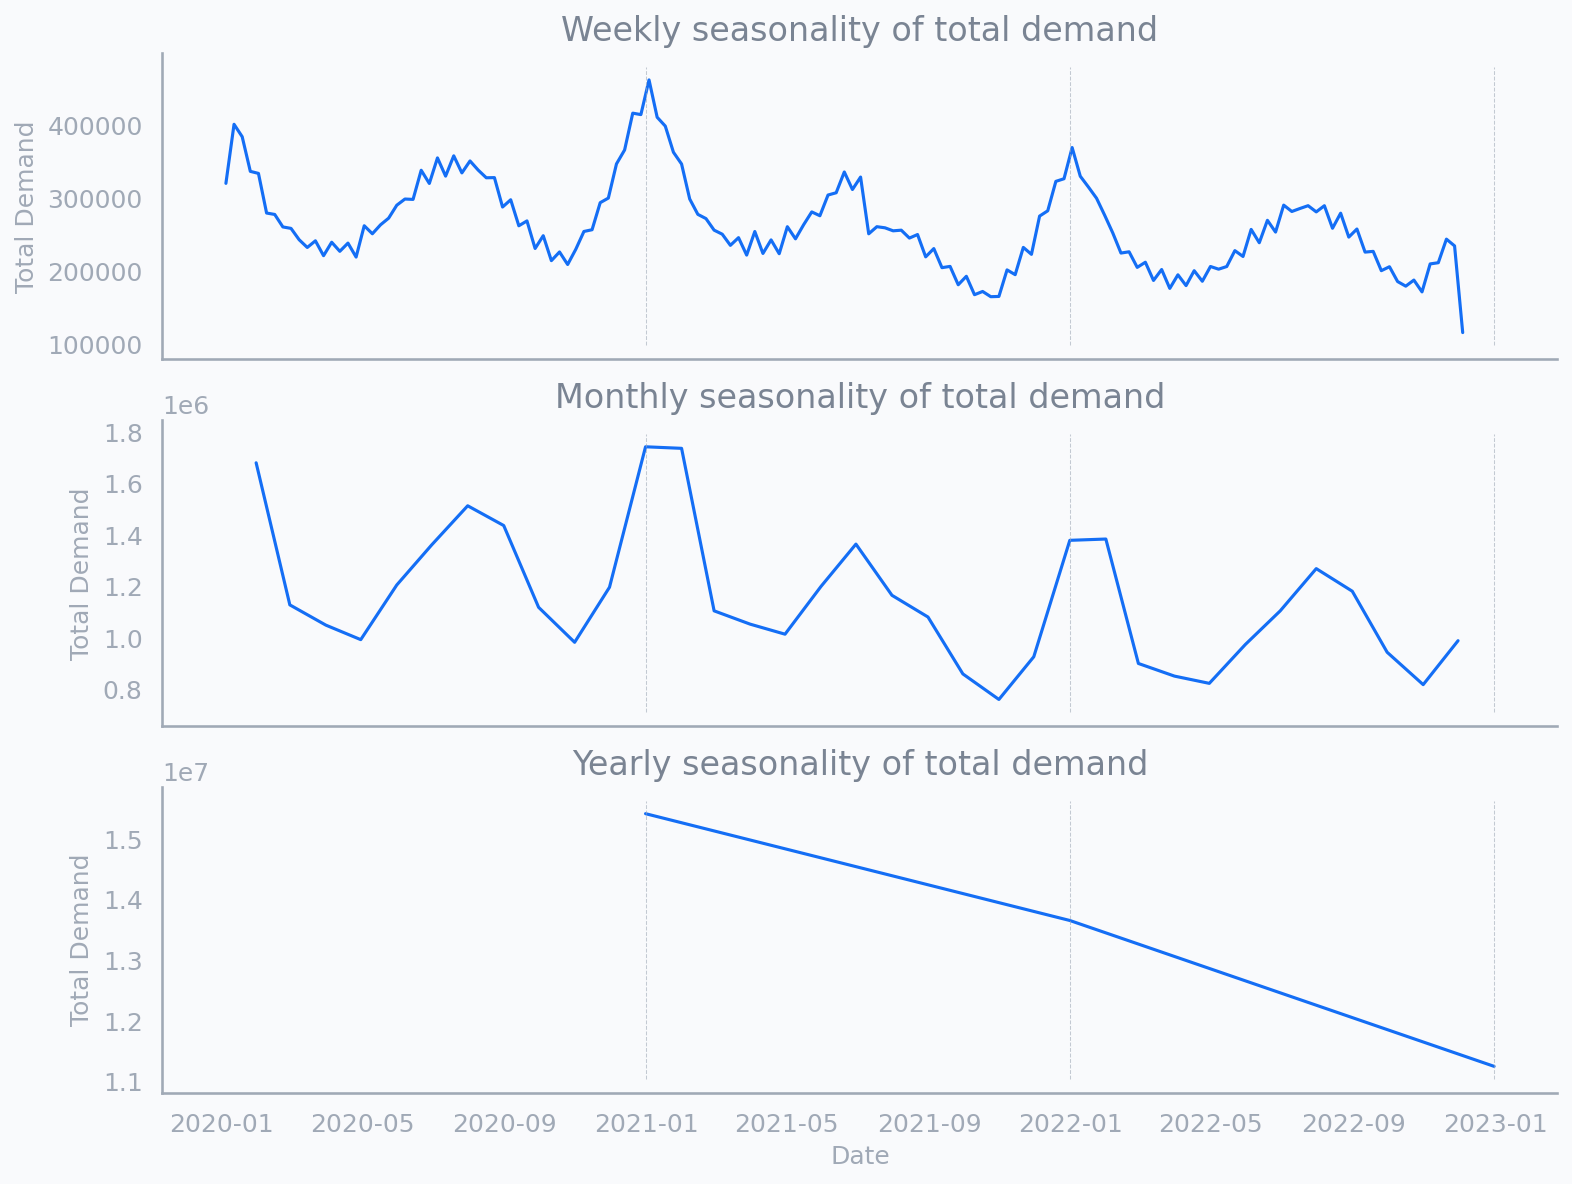

In [31]:
# create subplots of 3 rows and 1 column
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(12, 9))

# create subplot for each resampling period
for i, period in enumerate(['Weekly', 'Monthly', 'Yearly']):
    g = sns.lineplot(df_demand_pro.resample(period[0]).sum()['demand'], ax=axes[i])
    ymin, ymax = g.get_ylim()
    
    g.vlines(
        x=df_demand_pro.resample('Y').sum().index, 
        ymin=ymin, ymax=ymax,
        color=text, linestyle='--',
        alpha=0.6, linewidth=0.5
    )
    axes[i].set_title(f'{period} seasonality of total demand')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Total Demand')

plt.show()

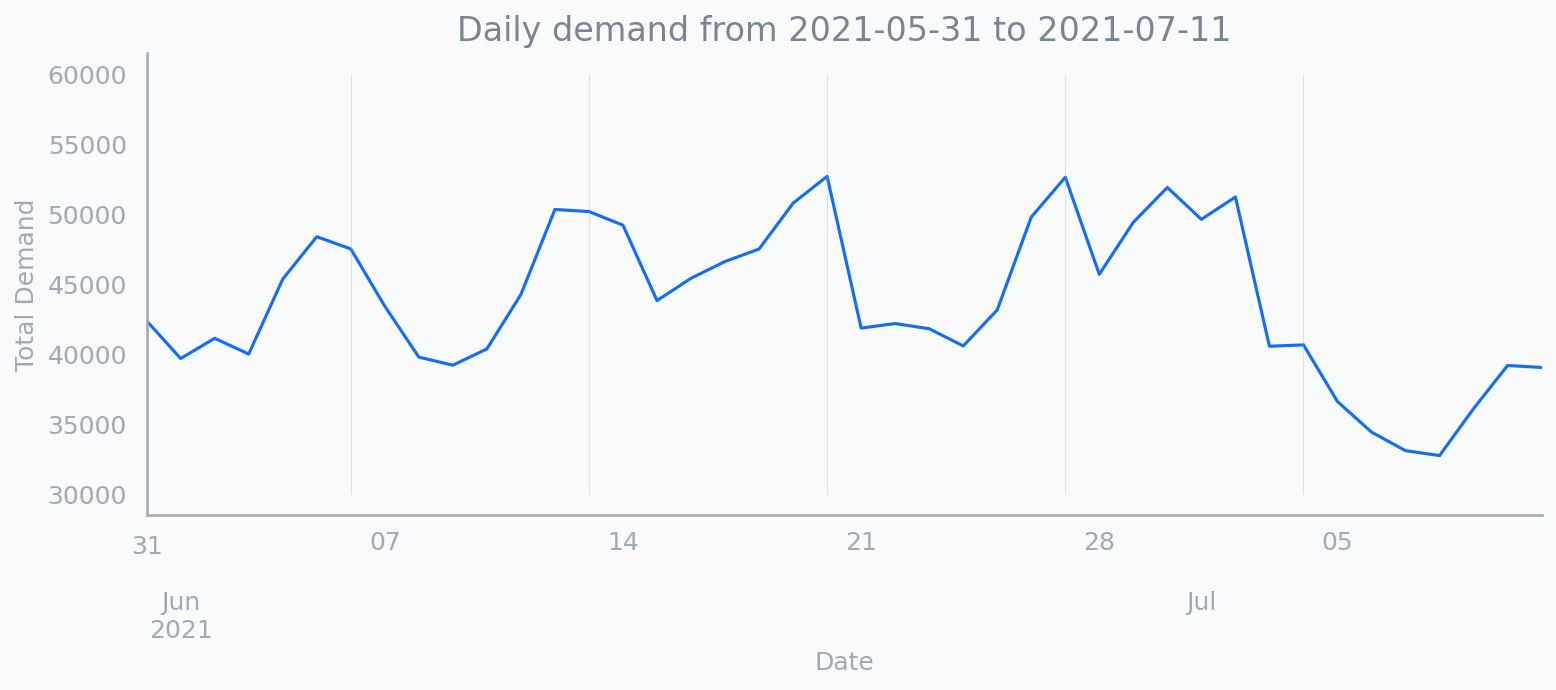

In [32]:
plt.figure(figsize=(12, 4))

date_start, date_end = '2021-05-31', '2021-07-11'
df_demand_pro.loc[date_start:date_end].resample('D').sum()['demand'].plot()
plt.vlines(
    x=df_demand_pro.loc[date_start:date_end].resample('W').sum().index, 
    ymin=30000, ymax=60000, color=text, 
    alpha=0.3, linewidth=0.5
)
plt.title(f'Daily demand from {date_start} to {date_end}')
plt.xlabel('Date')
plt.ylabel('Total Demand')
plt.show()

Here are the seasonality patterns for the overall sales:

- **Weekly Seasonality**: The weekly seasonality shows some fluctuations, but it's not very easy to discern a clear pattern at this scale. When we check some weeks we see peaks on weekends, which makes sense for a store. But's that isn't very consistent through time.

- **Monthly Seasonality**: There are some peaks and troughs, indicating that demand fluctuates on a monthly basis based on the period of the year: start and mid of the year.

- **Yearly Seasonality**: The yearly view shows a general downward trend in demand, although it's difficult to make out specific seasonal patterns since we only have 3 years of date.

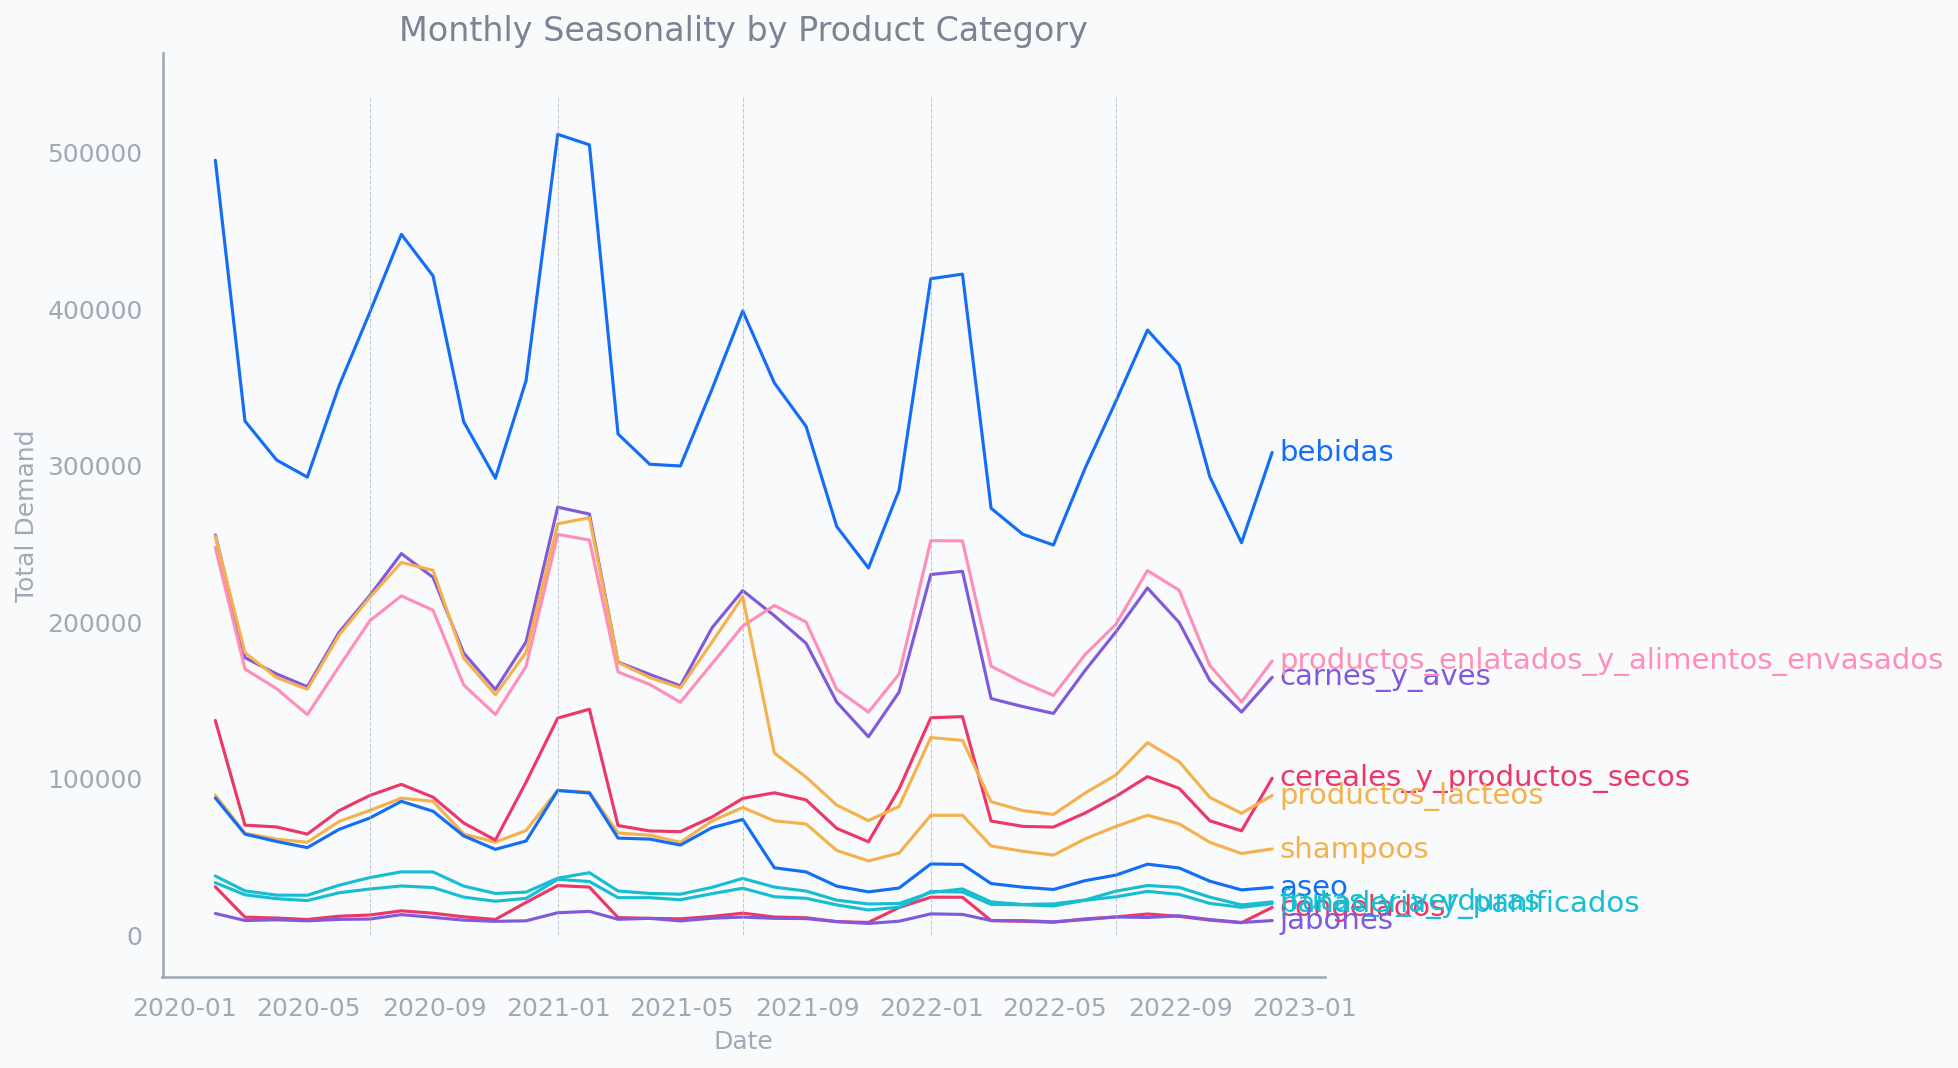

In [33]:
unique_categories = df_demand_pro['category'].unique()

plt.figure(figsize=(10, 8))

for category in unique_categories:
    category_data = df_demand_pro[df_demand_pro['category'] == category]
    monthly_data = category_data.resample('M').sum()['demand']
    g = sns.lineplot(monthly_data, label=category, legend=None)

for line, name in zip(g.lines, unique_categories):
    y = line.get_ydata()[-1]
    g.annotate(name, xy=(0.95, y), xytext=(6,0), color=line.get_color(), 
                xycoords = g.get_yaxis_transform(), textcoords="offset points",
                size=14, va="center")

ymin, ymax = plt.gca().get_ylim()
plt.vlines(
    x=df_demand_pro.resample('2Q', closed='left').sum().index[:-1], 
    ymin=0, ymax=ymax,
    color=text, linestyle='--',
    alpha=0.6, linewidth=0.5
)

plt.title('Monthly Seasonality by Product Category')
plt.xlabel('Date')
plt.ylabel('Total Demand')
# plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.3),
#           fancybox=False, shadow=False, ncol=1, frameon=0)
plt.show()

The graph clearly shows that sales for some products are seasonal. For example, “bebidas” (drinks) seem to have higher sales in January of each year. This could be due to increased consumption during the holiday season or the summer season when people tend to consume more beverages. Similarly, “carnes y aves” (meats and poultry) peak in May, which might be related to specific events or holidays in that period.

Some products consistently perform well throughout the year, while others have more fluctuation. Understanding these patterns can help in inventory management and marketing strategies.

We can see which product categories generally sell more than others. For instance, “bebidas” seems to have higher peaks compared to other categories, indicating it might be a top-selling category.

Some categories are remaining steady over time: cereals, canned products. While others are decreasing dramatically, like dairy or care products. The rest of them are slowly decreasing too, this could be in part because of the new competitor.

### 💸 Competitor impact

On July 2, 2021, a competitor opened a store just a few meters away. Let's see if we can quantify the impact of the competitor's opening.

In [34]:
# segment the data into before and after the competitor's opening
competitor_opening_date = '2021-07-02'
df_before = df_demand_pro[df_demand_pro.index < competitor_opening_date]
df_after = df_demand_pro[df_demand_pro.index >= competitor_opening_date]

# calculate average weekly sales for each period
avg_weekly_sales_before = df_before.resample('W').sum()['demand'].mean()
avg_weekly_sales_after = df_after.resample('W').sum()['demand'].mean()

print(f"Before: ${avg_weekly_sales_before:,.0f} -> After: ${avg_weekly_sales_after:,.0f}")
print(f"Change: {(avg_weekly_sales_after - avg_weekly_sales_before) / avg_weekly_sales_before:.2%}")

Before: $290,529 -> After: $231,728
Change: -20.24%


The average weekly demand have decreased by approximately 20.2%, which means it has had a significant negative impact on sales of our store.

We could see a negative trend in some products back in the seasonality analysis, let's see which ones were more affected by this using the same method.

In [35]:
categories = df_demand_pro['category'].unique()
avg_weekly_sales = {}

for category in categories:
    df_category = df_demand_pro[df_demand_pro['category'] == category]
    df_before = df_category[df_category.index < competitor_opening_date]
    df_after = df_category[df_category.index >= competitor_opening_date]
    
    avg_before = df_before.resample('W').sum()['demand'].mean().astype(int)
    avg_after = df_after.resample('W').sum()['demand'].mean().astype(int)
    demand_change = round(((avg_after - avg_before) / avg_before) * 100, 2)
    
    avg_weekly_sales[category] = {
        'Before': avg_before, 
        'After': avg_after,
        'Change': demand_change
    }
    
pd.DataFrame.from_dict(avg_weekly_sales, orient='index')

,Before,After,Change
bebidas,84921,70703,-16.74
congelados,3526,2817,-20.11
shampoos,16686,14027,-15.94
panaderia_y_panificados,6172,4923,-20.24
carnes_y_aves,45947,39563,-13.89
productos_enlatados_y_alimentos_envasados,42356,42469,0.27
aseo,15948,8073,-49.38
cereales_y_productos_secos,19913,19791,-0.61
productos_lacteos,45332,21601,-52.35
frutas_y_verduras,7271,5497,-24.40


From this, we can observe that: indeed, most categories experienced a decline in sales, with the "Productos Lácteos" and "Aseo" categories being most affected. The dairy and cereal product categories are the less affected.

In [36]:
df_demand_pro.select_dtypes(bool).columns

Index(['is_premium', 'is_exclusive', 'is_seasonal'], dtype='object')

In [37]:
avg_weekly_sales_by_attribute = {}

for attribute in df_demand_pro.select_dtypes(bool).columns:
    avg_weekly_sales = {}
    
    for value in [True, False]:
        df_value = df_demand_pro[df_demand_pro[attribute] == value]
        df_before = df_value[df_value.index < competitor_opening_date]
        df_after = df_value[df_value.index >= competitor_opening_date]
        
        avg_before = df_before.resample('W').sum()['demand'].mean()
        avg_after = df_after.resample('W').sum()['demand'].mean()
        demand_change = round(((avg_after - avg_before) / avg_before) * 100, 2)
        
        avg_weekly_sales_by_attribute[(attribute, value)] = {
            'Before': avg_before, 
            'After': avg_after,
            'Change': demand_change
        }
    
pd.DataFrame.from_dict(avg_weekly_sales_by_attribute, orient='index')

Before     After  Change
is_premium   True   28188.57  20289.20  -28.02
             False 262340.51 211438.49  -19.40
is_exclusive True  192098.39 148161.93  -22.87
             False  98430.68  83565.76  -15.10
is_seasonal  True   10551.96   8468.82  -19.74
             False 282915.63 225291.39  -20.37

We can note two things from this:
1. The decline is more significant for premium products −28.02% compared to non-premium −19.40%. This could mean that customers are opting for cheaper alternatives in the face of more choices.

2. It' concerning that sales for exclusive products dropped by −22.87%, so it's importart for the store to capitalize on this through targeted promotions or advertising.

### 📉 Trend

Are sales on an increasing or decreasing trend?

In [38]:
from statsmodels.tsa.seasonal import STL

weekly_sales = df_demand_pro.resample('W').sum()['demand']
stl = STL(weekly_sales, seasonal=7, robust=True)
result = stl.fit()

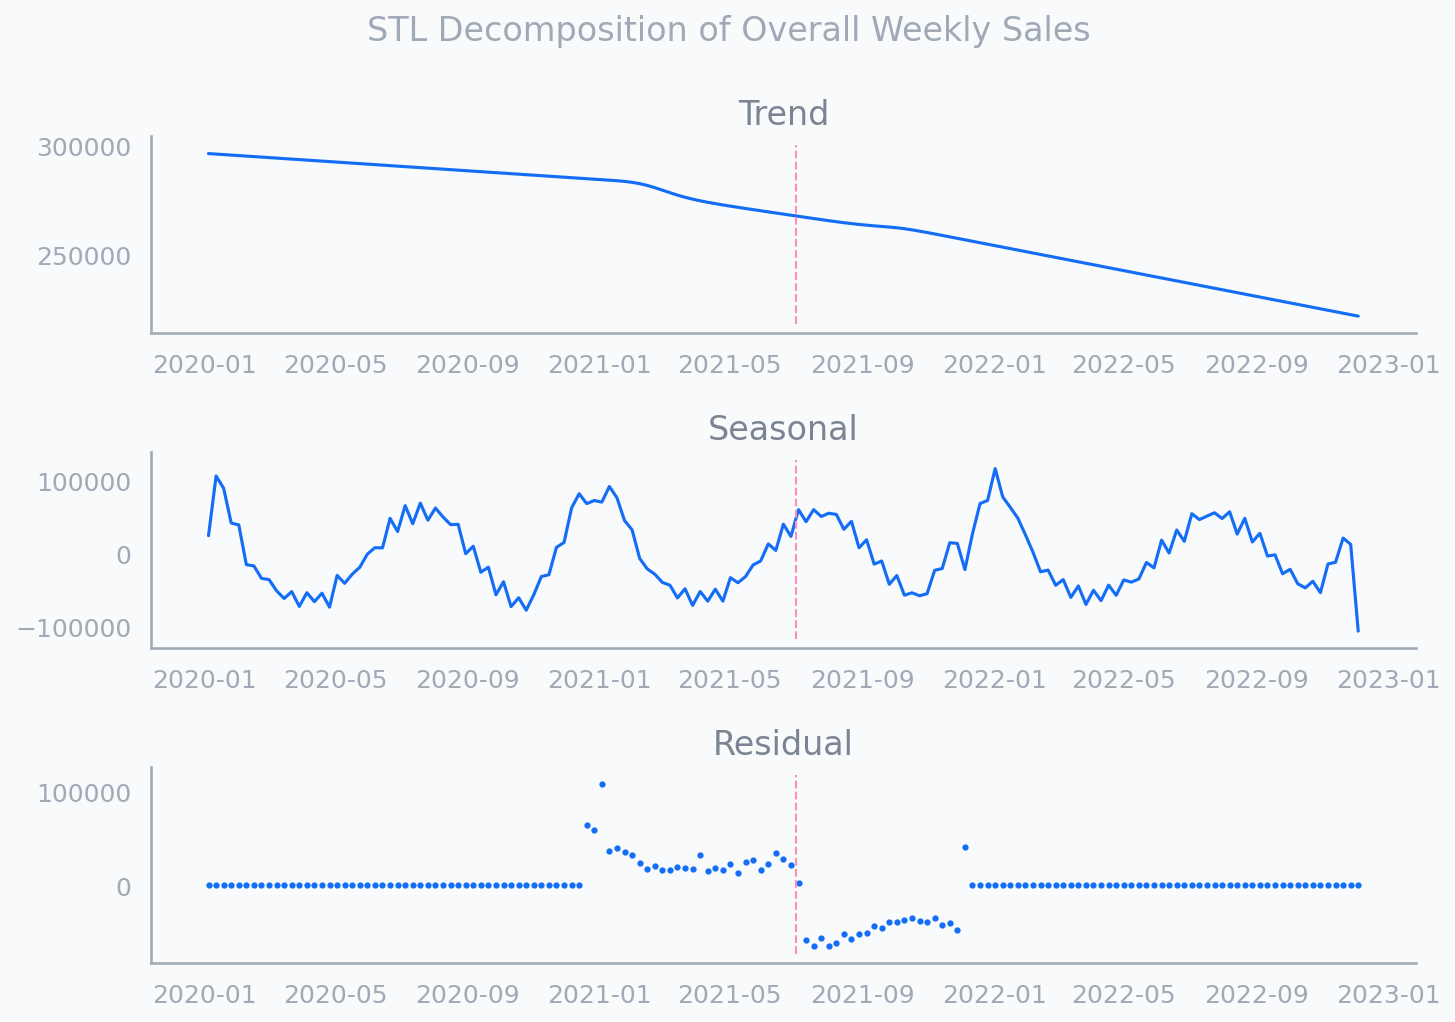

In [39]:
plt.figure(figsize=(10, 7))
plt.suptitle('STL Decomposition of Overall Weekly Sales', fontsize=16)

plt.subplot(3, 1, 1)
plt.plot(result.trend)
ymin, ymax = plt.gca().get_ylim()
plt.vlines(
    x=pd.Timestamp(competitor_opening_date), 
    ymin=ymin, ymax=ymax,
    color=pink, linestyle='--',
    alpha=1, linewidth=1
)
plt.title('Trend')

plt.subplot(3, 1, 2)
plt.plot(result.seasonal)
ymin, ymax = plt.gca().get_ylim()
plt.vlines(
    x=pd.Timestamp(competitor_opening_date), 
    ymin=ymin, ymax=ymax,
    color=pink, linestyle='--',
    alpha=1, linewidth=1
)
plt.title('Seasonal')

plt.subplot(3, 1, 3)
plt.plot(result.resid, 'o', markersize=2)
ymin, ymax = plt.gca().get_ylim()
plt.vlines(
    x=pd.Timestamp(competitor_opening_date), 
    ymin=ymin, ymax=ymax,
    color=pink, linestyle='--',
    alpha=1, linewidth=1
)
plt.title('Residual')

plt.tight_layout()
# rect=[0, 0, 1, 0.96]
plt.show()

After using LOESS to decompose the time series into trend and seasonality, overall it's clear that we have a decreasing trend.

But let's check if this was the case before the opening of the competitor.

To quantify the trend, we can perform a linear regression on the aggregated demand data. The slope of the regression line will indicate whether the sales are generally increasing (positive slope) or decreasing (negative slope) over time.

In [40]:
df_demand_before_comp = (
    df_demand_pro[df_demand_pro.index < competitor_opening_date]
    .resample('D').sum()['demand'].reset_index()
)

df_demand_before_comp['days_from_start'] = (
    df_demand_before_comp['date'] - df_demand_before_comp['date'].min()
).dt.days

X = df_demand_before_comp[['days_from_start']]
y = df_demand_before_comp['demand']

In [41]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope: {slope:.2f}   Intercept: {intercept:.1f}")

Slope: -1.61   Intercept: 42324.1


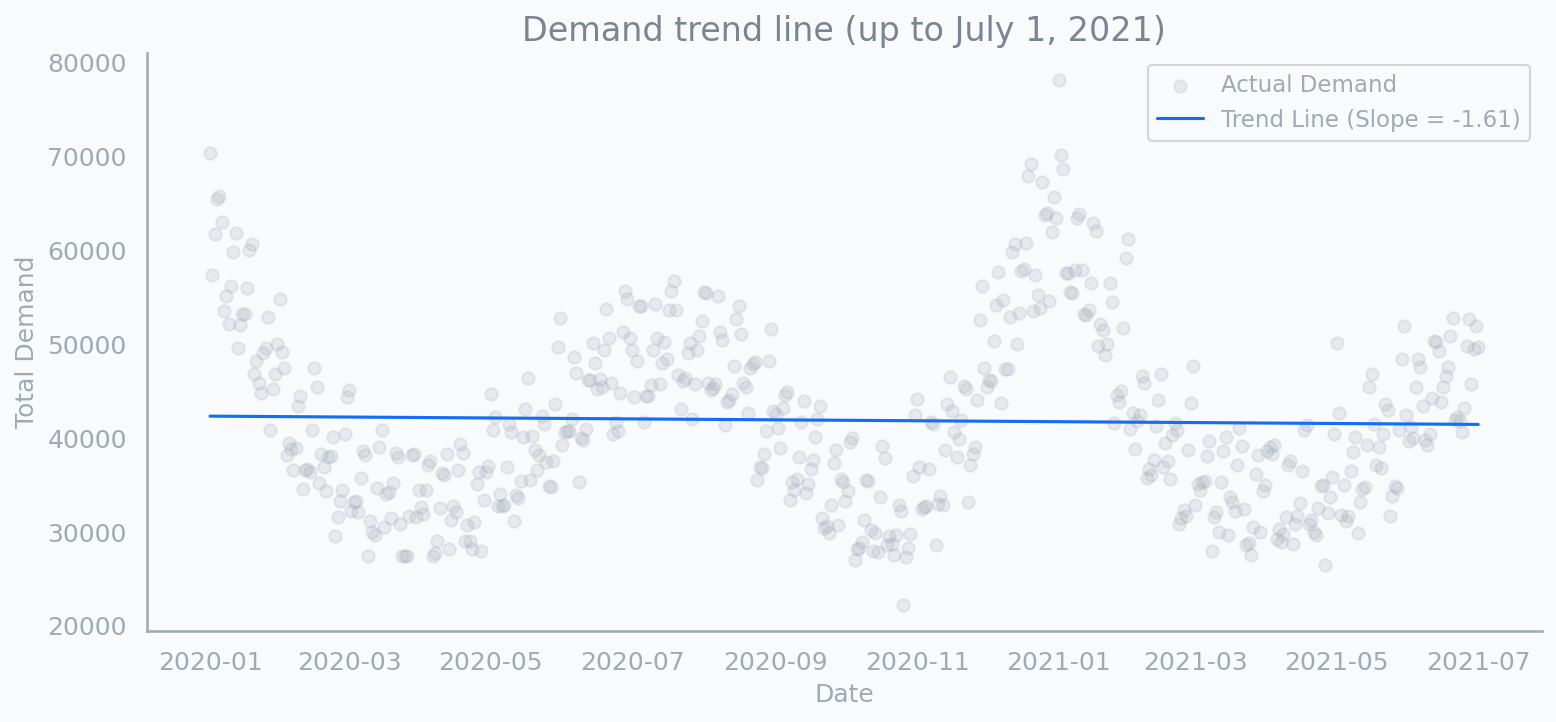

In [42]:
plt.figure(figsize=(12, 5))
plt.scatter(
    df_demand_before_comp['date'], 
    df_demand_before_comp['demand'], 
    label='Actual Demand',
    color=text,
    alpha=0.2
)
plt.plot(
    df_demand_before_comp['date'], 
    y_pred, 
    label=f'Trend Line (Slope = {slope:.2f})', 
    color=blue
)
plt.title('Demand trend line (up to July 1, 2021)')
plt.xlabel('Date')
plt.ylabel('Total Demand')
plt.legend()
plt.show()

The linear regression shows that the slope of the trend line is approximately −1.61. 

A negative slope indicates that the demand are generally on a decreasing trend up to July 1, 2021, even before the competitor's opening.

However, the slope is so small some could even argue that it's flat during this time and it's not until July 2nd, 2021 that the sales start to decrease significantly.